In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers.merge import dot
from keras.models import Model


# specifically for deeplearning.
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG
 
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


#TL pecific modules
from keras.applications.vgg16 import VGG16

In [2]:
train=pd.read_csv("/Users/patrickfahy99/Documents/Kaggle_datasets/movielens/rating.csv")

In [3]:
df=train.copy()

In [4]:
df.userId = df.userId.astype('category').cat.codes.values
df.movieId = df.movieId.astype('category').cat.codes.values

In [5]:
df = df.iloc[:1000000,:]

In [6]:
# creating utility matrix.
index=list(df['userId'].unique())
columns=list(df['movieId'].unique())
index=sorted(index)
columns=sorted(columns)
 
table=pd.pivot_table(data=df,values='rating',index='userId',columns='movieId')
# Nan implies that user has not rated the corressponding movie.

In [7]:
movies = pd.read_csv("/Users/patrickfahy99/Documents/Kaggle_datasets/movielens/movie.csv")
print(movies[movies['title'] == "Bad Boys (1995)"]['movieId'])

143    145
Name: movieId, dtype: int64


In [8]:
bad_boys = movies[movies['title'] == "Bad Boys (1995)"]
bad_boys['movieId']
movie = table[145]
similarity = table.corrwith(movie)  
similarity = similarity.sort_values(ascending=False)
similarity.head()

movieId
12923    1.0
5727     1.0
18017    1.0
11267    1.0
13840    1.0
dtype: float64

In [9]:
print(movies[movies['movieId'] == 1706]['title'])

1647    Tar (1996)
Name: title, dtype: object


In [10]:
table.fillna(0)

movieId,0,1,2,3,4,5,6,7,8,9,...,26370,26372,26397,26443,26525,26535,26544,26582,26588,26620
userId,,,,,,,,,,,,,,,,,,,,,
0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6738,4.0,0.0,4.0,1.0,0.0,4.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6740,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
users = df.userId.unique()
movies = df.movieId.unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

df['userId'] = df['userId'].apply(lambda x: userid2idx[x])
df['movieId'] = df['movieId'].apply(lambda x: movieid2idx[x])

split = np.random.rand(len(df)) < 0.8
train = df[split]
valid = df[~split]

In [12]:
n_movies=len(df['movieId'].unique())
n_users=len(df['userId'].unique())
n_latent_factors=64  # hyperparamter to deal with. 

user_input=Input(shape=(1,),name='user_input',dtype='int64')

user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
#user_embedding.shape

user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
#user_embedding.shape

user_vec =Flatten(name='FlattenUsers')(user_embedding)
#user_vec.shape

movie_input=Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec=Flatten(name='FlattenMovies')(movie_embedding)
#movie_vec

sim=dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1)
model =keras.models.Model([user_input, movie_input],sim)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 64)        431552      user_input[0][0]                 
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 64)        892800      movie_input[0][0]                
______________________________________________________________________________________________

In [13]:
model.compile(optimizer=Adam(lr=1e-4),loss='mse')

In [34]:
batch_size=128
epochs=20

In [35]:
History = model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.userId,valid.movieId],valid.rating),
                              verbose = 1)

Epoch 1/20
6253/6253 [==============================] - 47s 7ms/step - loss: 0.7047 - val_loss: 0.7761
Epoch 2/20
6253/6253 [==============================] - 45s 7ms/step - loss: 0.6942 - val_loss: 0.7699
Epoch 3/20
6253/6253 [==============================] - 44s 7ms/step - loss: 0.6842 - val_loss: 0.7640
Epoch 4/20
6253/6253 [==============================] - 44s 7ms/step - loss: 0.6746 - val_loss: 0.7583
Epoch 5/20
6253/6253 [==============================] - 45s 7ms/step - loss: 0.6651 - val_loss: 0.7536
Epoch 6/20
6253/6253 [==============================] - 45s 7ms/step - loss: 0.6557 - val_loss: 0.7485
Epoch 7/20
6253/6253 [==============================] - 49s 8ms/step - loss: 0.6465 - val_loss: 0.7442
Epoch 8/20
6253/6253 [==============================] - 45s 7ms/step - loss: 0.6375 - val_loss: 0.7401
Epoch 9/20
6253/6253 [==============================] - 46s 7ms/step - loss: 0.6283 - val_loss: 0.7364
Epoch 10/20
6253/6253 [==============================] - 46s 7ms/step - l

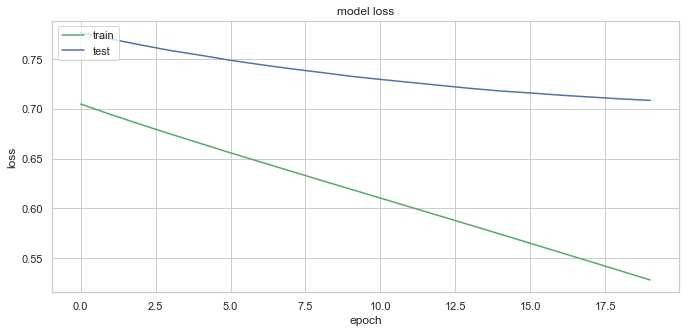

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

*** Neural Network ***

In [37]:
n_latent_factors=50
n_movies=len(df['movieId'].unique())
n_users=len(df['userId'].unique())

In [38]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec=Flatten(name='FlattenUsers')(user_embedding)
user_vec=Dropout(0.40)(user_vec)

movie_input=Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec=Flatten(name='FlattenMovies')(movie_embedding)
movie_vec=Dropout(0.40)(movie_vec)

In [39]:
sim=dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1)

In [40]:
nn_inp=Dense(96,activation='relu')(sim)
nn_inp=Dropout(0.4)(nn_inp)
# nn_inp=BatchNormalization()(nn_inp)
nn_inp=Dense(1,activation='relu')(nn_inp)
nn_model =keras.models.Model([user_input, movie_input],nn_inp)
nn_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        337150      user_input[0][0]                 
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 50)        697500      movie_input[0][0]                
____________________________________________________________________________________________

In [41]:
nn_model.compile(optimizer=Adam(lr=1e-3),loss='mse')

In [42]:
batch_size=128
epochs=30

In [45]:
History = nn_model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.userId,valid.movieId],valid.rating),
                              verbose = 1)

Epoch 1/30
6253/6253 [==============================] - 40s 6ms/step - loss: 1.1825 - val_loss: 0.9033
Epoch 2/30
6253/6253 [==============================] - 42s 7ms/step - loss: 0.8691 - val_loss: 0.7661
Epoch 3/30
6253/6253 [==============================] - 40s 6ms/step - loss: 0.7601 - val_loss: 0.7383
Epoch 4/30
6253/6253 [==============================] - 41s 7ms/step - loss: 0.7218 - val_loss: 0.7212
Epoch 5/30
6253/6253 [==============================] - 40s 6ms/step - loss: 0.7005 - val_loss: 0.7109
Epoch 6/30
6253/6253 [==============================] - 41s 7ms/step - loss: 0.6843 - val_loss: 0.7063
Epoch 7/30
6253/6253 [==============================] - 41s 7ms/step - loss: 0.6723 - val_loss: 0.6993
Epoch 8/30
6253/6253 [==============================] - 41s 7ms/step - loss: 0.6623 - val_loss: 0.6994
Epoch 9/30
6253/6253 [==============================] - 41s 7ms/step - loss: 0.6549 - val_loss: 0.6913
Epoch 10/30
6253/6253 [==============================] - 41s 7ms/step - l

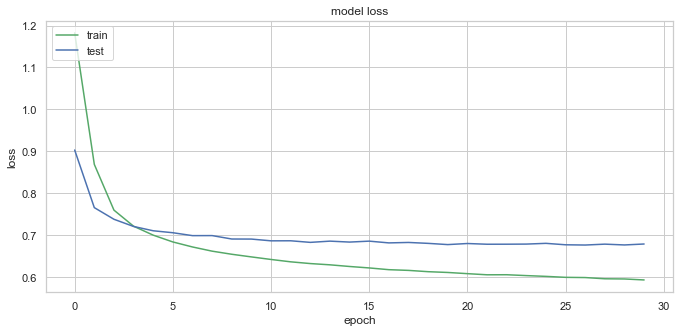

In [46]:
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()